# **Desarrollo de una Red Neuronal para clasificar el dibujo de un número entre el 0 y el 9**

La Red Neuronal es Convolucional, con Dropout, y se entreno con aumento de la base de datos de mnist.

In [1]:
import tensorflow as tf                               #Importo libreria Machine Learning
from tensorflow.keras.datasets import mnist           #Base de Datos
import numpy as np
from tensorflow.keras.utils import to_categorical     #Clasificacion de Imagenes

from tensorflow.keras.callbacks import TensorBoard    #Para Visualización de proceso de Entrenamiento


#Se cargan los datos
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
#reshape de datos:  (1, 28, 28, 1)
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)


# 'one-hot encoding' de resultados: tendre 10 neuronas, donde solo una será 1 y el resto será 0
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)


#Se convirtio a flotante y se normalizo
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

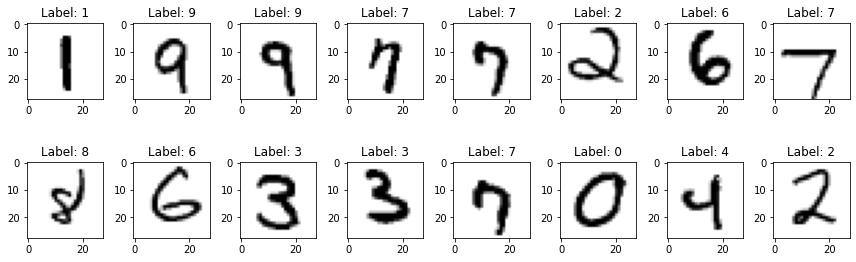

In [7]:
#Ejemplo del set de datos

import matplotlib.pyplot as plt
import random


filas = 2
columnas = 8
num = filas*columnas
background = random.randint(0, 10000)
imagenes = X_entrenamiento[background:background+num]
etiquetas = Y_entrenamiento[background:background+num]

fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))

for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
     
plt.tight_layout()
plt.show()

In [8]:
#Aumento de datos


#Se usa ImageDataGenerator de keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Variables para controlar las transformaciones que se haran en el aumento de datos
rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
rango_inclinacion=10
rango_acercamiento=[0.5,1.5]


datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    shear_range=rango_inclinacion, 
    zoom_range=rango_acercamiento
)


datagen.fit(X_entrenamiento)

Set Previo:



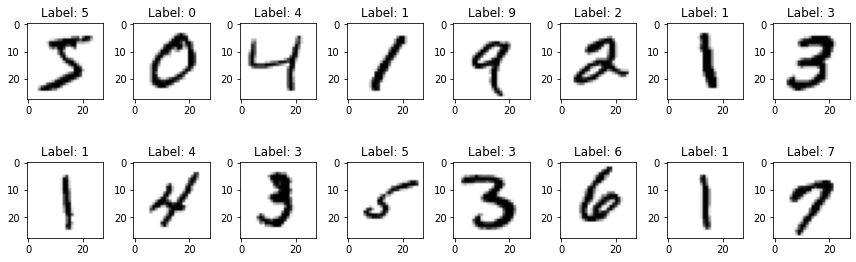

Set Aumentado:



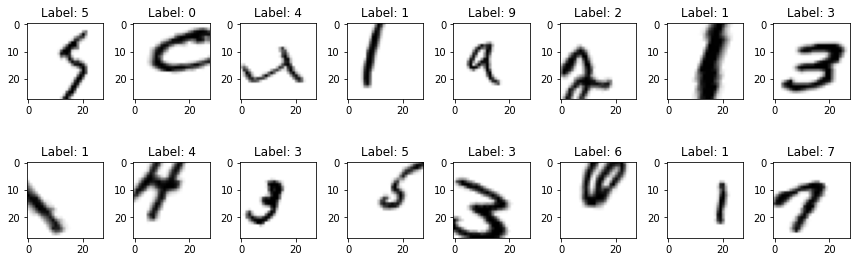

In [11]:
# Ejemplo de Set de datos Aumentado

filas = 2
columnas = 8
num = filas*columnas



print('Set Previo:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))

for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))

plt.tight_layout()
plt.show()



print('Set Aumentado:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))

for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
     
plt.tight_layout()
plt.show()

In [ ]:
#Modelo de Machine Learning


modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),         #Convolucional de matrices 3x3
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                                  #Convolucional de matrices 3x3
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),                                                          #Dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                        # 'one-hot encoding' : 10 neuronas de salida con softmax
])


#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',                                             #perdida
              metrics=['accuracy'])

In [ ]:
#Los datos de entrenamiento son del datagen, que dependen de las transformaciones asociadas al aumento de datos
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [ ]:
#Se entrena a la red

print("Entrenando modelo...");
TAMANO_LOTE = 32
epocas=250


tensorboardNum200 = TensorBoard(log_dir='logs/Num200')

history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE))),
    callbacks=[tensorboardNum200])
)

print("Modelo entrenado!");

In [ ]:
#Se carga la extension de tensorboard 
%load_ext tensorboard

In [ ]:
#Se ejecuta tensorboard yse indica que lea la carpeta "logs"
%tensorboard --logdir logs

In [ ]:
#Se exporta el modelo
modelo.save('numeros_conv_ad_do.h5')

#Se convierte a tensorflow.js
!pip install tensorflowjs

!mkdir carpeta_salida

!tensorflowjs_converter --input_format keras numeros_conv_ad_do.h5 carpeta_salida